✅ Section 1 — Load and Predict

In [3]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve, auc
)

# Load model + scaler + test data
model = joblib.load('../models/best_model.pkl')
scaler = joblib.load('../models/scaler.pkl')

X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')['Churn']

X_test_scaled = scaler.transform(X_test)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

print("Loaded model + generated predictions ✔")


Loaded model + generated predictions ✔


✅ Section 2 — Performance Metrics

In [8]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc
}

pd.DataFrame([metrics])


,accuracy,precision,recall,f1_score,roc_auc
0,0.998848,1.0,0.996552,0.998273,1.0


✅ Section 3 — Visualisations

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('../visualizations', exist_ok=True)


1️⃣ Confusion Matrix

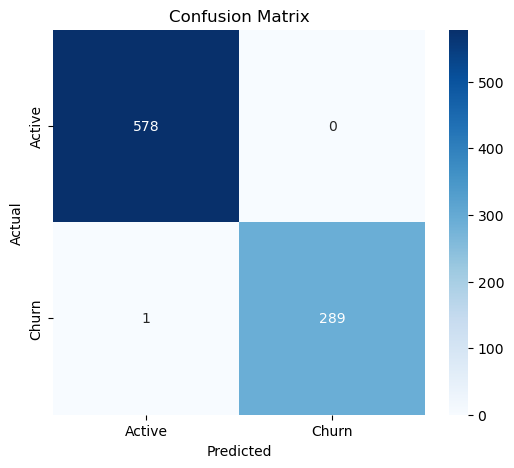

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Active','Churn'],
            yticklabels=['Active','Churn'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('../visualizations/confusion_matrix.png')
plt.show()


2️⃣ ROC Curve

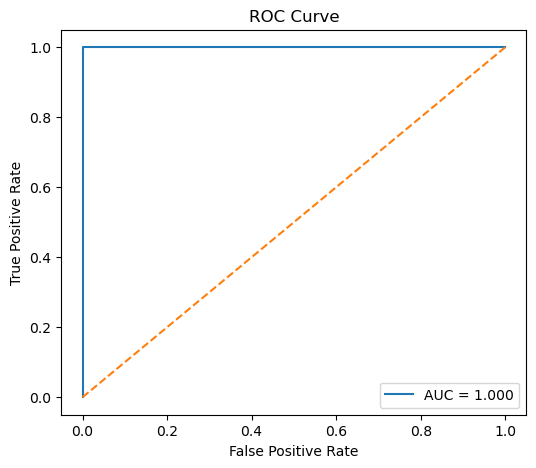

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('../visualizations/roc_curve.png')
plt.show()


3️⃣ Precision-Recall Curve

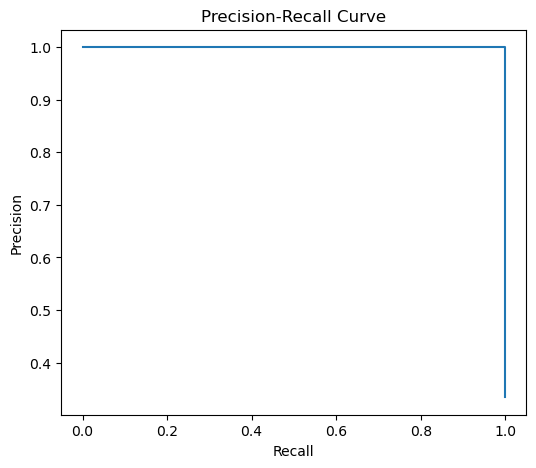

In [25]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.savefig('../visualizations/precision_recall_curve.png')
plt.show()


4️⃣ Probability Distribution

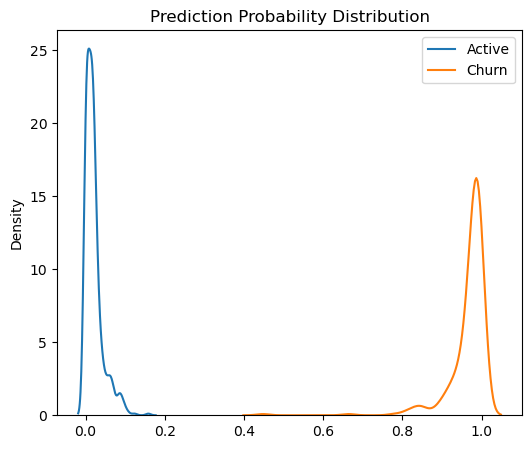

In [28]:
plt.figure(figsize=(6,5))
sns.kdeplot(y_proba[y_test==0], label="Active")
sns.kdeplot(y_proba[y_test==1], label="Churn")
plt.title("Prediction Probability Distribution")
plt.legend()
plt.savefig('../visualizations/probability_distribution.png')
plt.show()


### Feature Importance

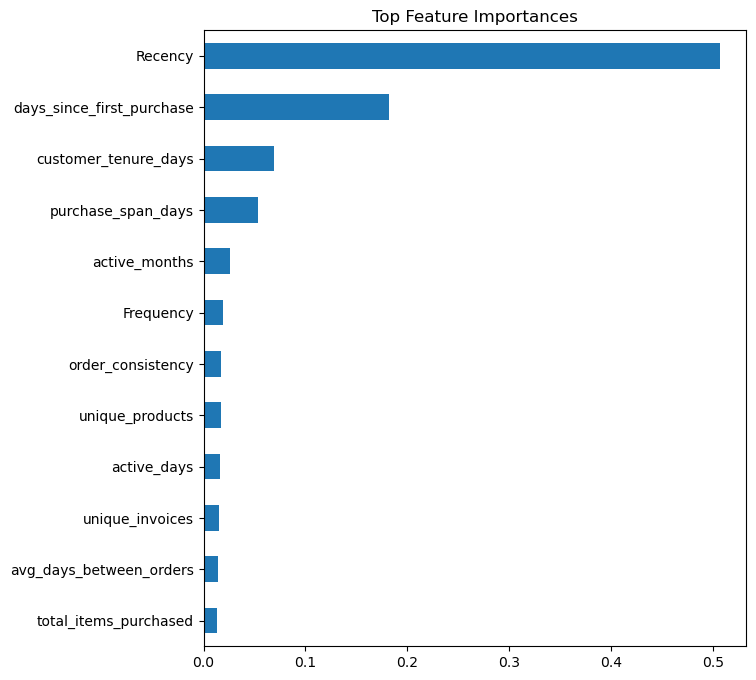

In [31]:
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_test.columns).sort_values()

plt.figure(figsize=(7,8))
feat_imp.tail(12).plot(kind='barh')
plt.title("Top Feature Importances")
plt.savefig('../visualizations/feature_importance.png')
plt.show()


6️⃣ Calibration Curve

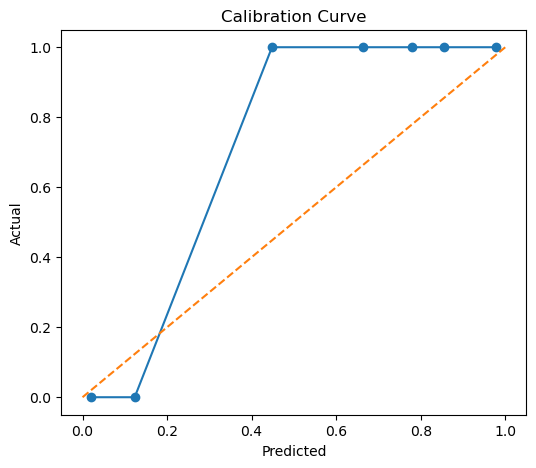

In [34]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Calibration Curve")
plt.savefig('../visualizations/calibration_curve.png')
plt.show()


7️⃣ Churn vs Probability Barplot

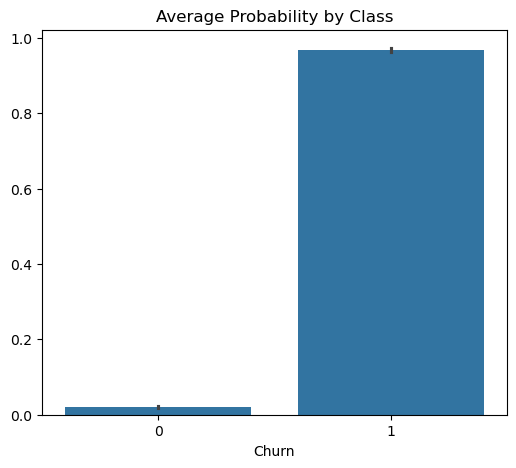

In [37]:
plt.figure(figsize=(6,5))
sns.barplot(x=y_test, y=y_proba)
plt.title("Average Probability by Class")
plt.savefig('../visualizations/probability_by_class.png')
plt.show()


8️⃣ Residual Error Plot


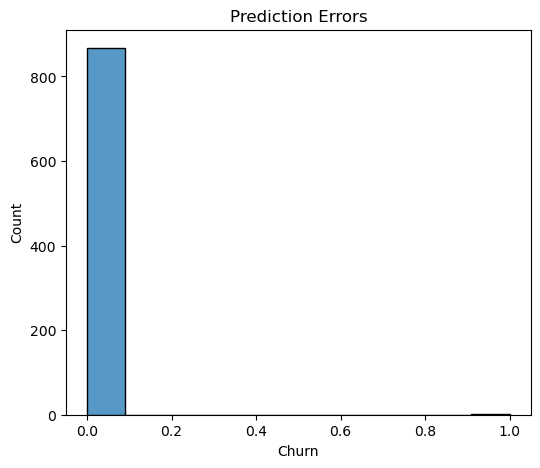

In [40]:
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(6,5))
sns.histplot(errors)
plt.title("Prediction Errors")
plt.savefig('../visualizations/error_histogram.png')
plt.show()


✅ Section 4 — Error Analysis

In [43]:
test_df = X_test.copy()
test_df['Churn'] = y_test
test_df['Prediction'] = y_pred
test_df['Prob'] = y_proba

fp = test_df[(test_df['Churn']==0)&(test_df['Prediction']==1)]
fn = test_df[(test_df['Churn']==1)&(test_df['Prediction']==0)]

print("False Positives:", len(fp))
print("False Negatives:", len(fn))


False Positives: 0
False Negatives: 1
